## Importing required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("vaccination.csv",index_col='Updated On',parse_dates=True)
df.head()

,First Dose Administered
Updated On,
2021-01-16,48276
2021-01-17,58604
2021-01-18,99449
2021-01-19,195525
2021-01-20,251280


In [3]:
first_dose = df["First Dose Administered"].values

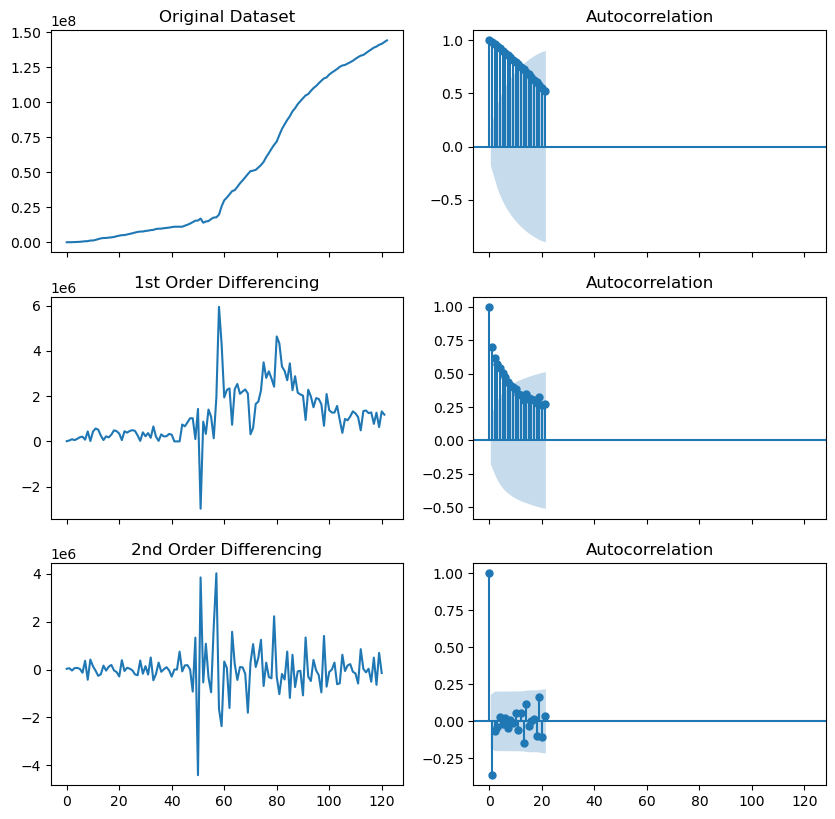

In [4]:
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(first_dose); axes[0, 0].set_title('Original Dataset')
plot_acf(first_dose, ax=axes[0, 1])

axes[1, 0].plot(np.diff(first_dose)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(first_dose), ax=axes[1, 1])
first_diff = np.diff(first_dose)

axes[2, 0].plot(np.diff(first_diff)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(first_diff), ax=axes[2, 1])
plt.show()

## Fitting ARIMA Model :

In [5]:
fit = auto_arima(df["First Dose Administered"], trace = True, suppress_warnings = True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3645.095, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3667.842, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3652.667, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3641.663, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3641.330, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3643.128, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3643.191, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3641.859, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3648.438, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3643.553, Time=0.08 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.765 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1817.665
Date:                Thu, 03 Jun 2021   AIC                           3641.330
Time:                        15:27:12   BIC                           3649.718
Sample:                             0   HQIC                          3644.737
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2552      0.126      2.020      0.043       0.008       0.503
ma.L1         -0.7756      0.102     -7.590      0.000      -0.976      -0.575
sigma2      6.947e+11   3.27e-14   2.13e+25      0.000    6.95e+11    6.95e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               898.26
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.92   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+41. Standard errors may be unstable.
"""

In [6]:
days = int(input("Enter no. of days for forecasting vaccination rate :"))

Enter no. of days for forecasting vaccination rate :60


In [7]:
f, confint = fit.predict(n_periods = days, return_conf_int=True)
f_index = np.arange(len(first_dose), len(first_dose)+ days)

forecast = pd.Series(f, index = f_index)
ls = pd.Series(confint[:, 0], index = f_index)
us = pd.Series(confint[:, 1], index = f_index)

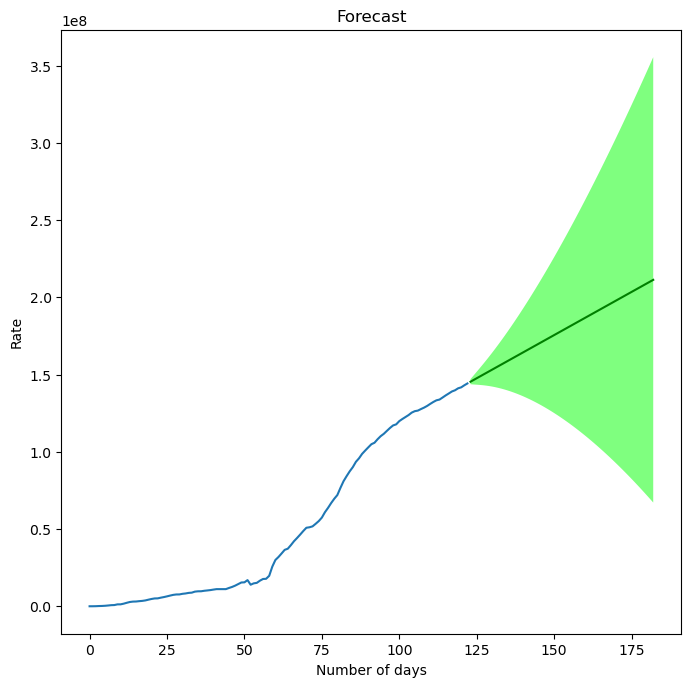

In [8]:
plt.figure(figsize = (8,8))
plt.plot(first_dose)
plt.plot(forecast, color='green')
plt.fill_between(ls.index, ls, us, alpha=0.5, facecolor='lime')
plt.title("Forecast")
plt.xlabel("Number of days")
plt.ylabel("Rate")
plt.show()

## Conclusion :

### Green line shows the forecasted rate for upcoming days while the green shaded region gives us the upper and lower limit of the same. Also the above graph represents people getting vaccinated all over India and not just to one particular state.